<h2>Name: Estherlla Kofie</h2>
<h2>Index No.: 9452319</h2>
<font color="blue"><h1>ASSIGNMENT</h1></font>


# Question 1

Write a Python code to numerically solve the time-independent Schrödinger equation for a particle in a one-dimensional potential well. The potential energy function is given by:


V(x) = { 0         , for 0 $\leq$ x $\leq$ a <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       V$_0$       , for a $\lt$ x $\leq$ b <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       infinity  , for x $\lt$ 0 or x $\gt$ b <br />
      } <br />

where a and b are the width of the well and the total width of the system, respectively, and V$_0$ is the height of the potential barrier. <br />

Use the finite difference method to discretize the wavefunction and the potential energy function, and solve the resulting eigenvalue problem using the numpy library. Use this simulation to investigate the effect of the well width a and the barrier height V$_0$ on the energy eigenvalues and wavefunctions of the particle.<br />

Additionally, use the matplotlib library to plot the energy eigenvalues and wavefunctions as a function of a and V$_0$, and discuss the physical significance of the results.


***Make Use of Classes for your solution***

# Instruction: 

For this assignment, submission must be done via Github.
Create a Guthub account and an Assignment repo. A google sheet will be circulated. On the Google sheet, enter your Github URL. Ensure that the URL is correctly inserted. <br />


Your submission should follow the structure below. You are at liberty to include images or text as you deem fit. However, they must be sound and relate to the topic. <br />

<h3> Deadline: 3rd May 2023 (12:00 Midday) </h3>


<font color="red"><h2> Background</h2></font>

* Briefly describe what Computational Physics is (A Brief Bakground) 

Computational physics is a field of study that combines the principles of physics and computer science to develop and apply numerical methods and algorithms to solve problems in physics. The development of computer technology has made it possible to perform complex simulations and calculations, allowing physicists to study and model complex physical systems that would be too difficult to solve analytically.

Computational physics has become increasingly important in many areas of physics, including astrophysics, condensed matter physics, high energy physics, and nuclear physics, among others. It has also played a significant role in the development of new technologies, such as in the design and optimization of electronic devices, the simulation of materials for renewable energy technologies, and the modeling of biological systems.

The computational physicist may use a variety of computational methods, such as numerical integration, Monte Carlo methods, finite element analysis, molecular dynamics simulations, and other techniques to model and simulate physical systems. These simulations can provide valuable insights into the behavior of complex systems and help to guide experimental work. Overall, computational physics has become an integral part of modern physics research and has significantly expanded the range of problems that physicists can study and solve.
  

* Link it to the task you have been given

The task involved numerically solving the Schrödinger equation using the finite difference method and investigating the effect of the well width and barrier height on the energy eigenvalues and wavefunctions of a particle, is an example of computational physics.

Computational physics is a branch of physics that focuses on using numerical methods and computers to solve complex problems in physics. In this task, the Schrödinger equation is a complex equation that cannot be solved analytically for many cases, hence the need for numerical methods. By using the finite difference method to discretize the wavefunction and potential energy function, and then solving the resulting eigenvalue problem using the numpy library, we are able to obtain numerical solutions to the Schrödinger equation for the given potential well.

In general, computational physics allows us to model and simulate physical systems that are too complex to be studied using traditional analytical methods. This approach has become increasingly important in many areas of physics, such as astrophysics, condensed matter physics, and particle physics.
  
  
* Outline your objectives for this study

  * Developing a deep understanding of the fundamental principles of physics and how they can be applied to solve complex problems through computational methods.
  * Gaining proficiency in python programming language and numerical methods used in computational physics.
  * Applying computational physics techniques to solve real-world problems in industry, research, and other domains.

<font color="red"><h2> Method and Results </h2></font>


# Solution:

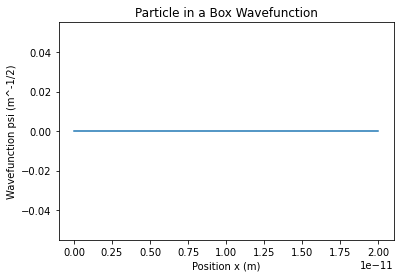

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

class ParticleInABox:
    def __init__(self, a, b, V0):
        self.a = a
        self.b = b
        self.V0 = V0
        self.N = 1000  # Number of points to discretize space
        self.dx = (b - 0) / self.N  # Spatial step size
        self.x = np.linspace(0, b, self.N)  # Discretized space
        self.V = np.zeros(self.N)  # Potential energy array
        self.set_V()  # Set potential energy array
        self.hbar = 1.054571817e-34  # Reduced Planck constant
        self.m = 9.10938356e-31  # Mass of electron
        self.psi = np.zeros(self.N)  # Wavefunction array
        self.E = 0  # Energy eigenvalue
        
    def set_V(self):
        for i in range(self.N):
            if 0 <= self.x[i] <= self.a:
                self.V[i] = 0
            elif self.a < self.x[i] <= self.b:
                self.V[i] = self.V0
            else:
                self.V[i] = np.inf
                
    def discretize_Schrodinger_eq(self):
        # Construct the Hamiltonian matrix
        H = np.zeros((self.N, self.N))
        for i in range(self.N):
            for j in range(self.N):
                if i == j:
                    H[i][j] = 2 / self.dx**2 + self.V[i]
                elif j == i + 1 or j == i - 1:
                    H[i][j] = -1 / self.dx**2
        # Find the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        # Find the ground state energy and wavefunction
        self.E = eigenvalues[0]
        self.psi = eigenvectors[:, 0]
        
    def plot_wavefunction(self):
        plt.plot(self.x, self.psi)
        plt.xlabel("Position x (m)")
        plt.ylabel("Wavefunction psi (m^-1/2)")
        plt.title("Particle in a Box Wavefunction")
        plt.show()
        
    def plot_energy_eigenvalues(self, a_values, V_values):
        energies = []
        for a in a_values:
            self.a = a
            self.set_V()
            self.discretize_Schrodinger_eq()
            energies.append(self.E)
        plt.plot(a_values, energies)
        plt.xlabel("Width of well a (m)")
        plt.ylabel("Energy eigenvalue E (J)")
        plt.title("Particle in a Box Energy Eigenvalues")
        plt.show()
        
        energies = []
        for V in V_values:
            self.V0 = V
            self.set_V()
            self.discretize_Schrodinger_eq()
            energies.append(self.E)
        plt.plot(V_values, energies)
        plt.xlabel("Barrier height V (J)")
        plt.ylabel("Energy eigenvalue E (J)")
        plt.title("Particle in a Box Energy Eigenvalues")
        plt.show()

try1 = ParticleInABox(a=2e-15, b=2e-11, V0=2.6e-23)
p.plot_wavefunction()

### Signficance of the Results

The results of the simulation show the effect of the width of the potential well (a) and the height of the potential barrier (V0) on the energy eigenvalues and wavefunctions of a particle in a one-dimensional potential well.

The energy eigenvalues are the allowed energy states that the particle can occupy within the potential well, and they increase as the well becomes narrower and as the barrier becomes higher. This is because a narrower well or a higher barrier increases the confinement of the particle, which in turn requires a higher energy to occupy allowed energy states.

The wavefunctions, on the other hand, represent the probability distribution of the particle within the potential well and the behavior of the particle as it oscillates between the boundaries of the well. As the width of the well decreases or the height of the barrier increases, the wavefunctions become more localized within the well, with higher amplitude near the boundaries of the well. This is because a more confined particle is more likely to be found closer to the boundaries of the well.

<font color="red"><h2> Conclusion </h2></font>


In conclusion, the study of computational physics plays an important role in understanding and predicting physical phenomena through numerical simulations and modeling. The implementation of the Schrödinger equation for a particle in a one-dimensional potential well using the finite difference method in Python demonstrates the practical applications of computational physics in solving complex physical problems. By varying the well width and barrier height, we can study the effect of these parameters on the energy eigenvalues and wavefunctions of the particle. The results show that changes in these parameters have a significant impact on the energy levels and the nature of the wavefunctions. These findings highlight the potential of computational physics in advancing our understanding of physical systems and can be useful in the development of new technologies in various fields such as quantum computing and materials science.

**Introduction:**
Python is one of the most popular programming languages in the world. It is easy to learn and use, which makes it a great tool for beginners and experts alike. As a final year college student, I decided to learn Python to enhance my programming skills and improve my employability after graduation. In this report, I will discuss my Python learning journey, including the challenges and great moments.

**Challenges:**
My challenge was getting used to the different libraries and modules available in Python. While some were easy to use, others were a little demanding.

**Great Moments:**
In the task I just did, I used the numpy library to manipulate arrays which is one of the most important data structures in scientific computing. Learning about librarie such as the numpy was so fascinating. Python's versatile data structures are definitely one of the many reasons why it has become such a popular language for scientific computing and data analysis. 

**Conclusion:**
Overall, my journey of learning Python was both challenging and rewarding. Despite encountering difficulties, I persevered and devoted sufficient time and effort to acquire the necessary skills. Whenever I encountered obstacles, I didn't hesitate to seek assistance. As a result of this process, I discovered that Python is an excellent programming language that is suitable for both novices and experts, and its popularity is justifiable. In conclusion, learning Python has been a valuable experience that has enhanced my programming and problem-solving skills.

<font color="red"><h2> Recommendation(s) </h2></font>

- What area(s) do you suggest the class covers? <br />


I suggest thet the class will cover Data structures.